In [16]:
from text_adventure_games import games, parsing, actions, things, blocks, viz
from text_adventure_games import (
    games, parsing, actions, things, blocks, viz
)

# Locations
farm = things.Location(
    "Farm",
    "Your cozy farm with fertile soil. There's plenty of space to grow crops."
)
town = things.Location(
    "Town Square",
    "The bustling center of the town, with shops and friendly faces."
)
mine = things.Location(
    "Mine Entrance",
    "The entrance to a dark, mysterious mine full of valuable ores and potential dangers."
)
fishing_pond = things.Location(
    "Fishing Pond",
    "You are at the edge of a pond."
)
cave = things.Location(
    "Deep Cave",
    "A dimly lit cave deep within the mine, where rare gems can be found."
)

beach = things.Location(
    "Beach",
    "A sunny beach with clear waters, perfect for fishing and relaxation."
)
forest = things.Location(
    "Forest",
    "A lush forest teeming with wildlife and forageable items."
)

death = things.Location(
    "The Afterlife",
    "You drowned and You are dead. GAME OVER."
)
death.set_property("game_over", True)

# Connect locations
farm.add_connection("down", town)
town.add_connection("up", farm)
town.add_connection("south", mine)
mine.add_connection("north", town)
mine.add_connection("south", cave)
cave.add_connection("north", mine)

town.add_connection('down', forest)
forest.add_connection('up', town)

town.add_connection('west', beach)
beach.add_connection('east',town)
beach.add_connection('west',fishing_pond)

fishing_pond.add_connection("east", beach)
# beach.add_connection('jump',death)


In [17]:
# Items
hoe = things.Item(
    "hoe", 
    "a sturdy hoe", 
    "A RELIABLE TOOL FOR TILLING SOIL."
    )

hoe.add_command_hint("pick the hoe")
hoe.set_property("is_weapon", True)
hoe.set_property("is_fragile", False)


seeds = things.Item(
    "seeds", 
    "a packet of seeds", 

    "VEGETABLE SEEDS READY FOR PLANTING.")

# Seeds
seeds.add_command_hint("Pick the Seed")
seeds.set_property("is_plantable", True)
# seeds.set_property("growth_time", 3)  # Days to grow


pickaxe = things.Item(
    "pickaxe", 
    "a sturdy pickaxe", 
    "PERFECT FOR MINING ORES.")

# Pickaxe
# pickaxe.add_command_hint("Pick the axe")
pickaxe.set_property("is_tool", True)
pickaxe.set_property("is_weapon", True)


fishing_pole = things.Item(
    "pole",
    "a fishing pole",
    "A SIMPLE FISHING POLE.",
)


gem = things.Item(
    "gem", 
    "a sparkling gem", 
    "A VALUABLE GEM FROM THE DEPTHS OF THE MINE.")
gem.add_command_hint("Pick the gem")

# fish = things.Item(
#     "fish", 
#     "a fresh fish", 
#     "A TASTY FISH CAUGHT FROM THE BEACH.")
# fish.set_property("is_food", True)

pond = things.Item(
    "pond",
    "a small fishing pond",
    "THERE ARE FISH IN THE POND.",
)
pond.set_property("gettable", False)
pond.set_property("has_fish", True)
pond.add_command_hint("catch fish")
pond.add_command_hint("catch fish with pole")


mushroom = things.Item(
    "mushroom", 
    "a wild mushroom", 
    "A VALUABLE MUSHROOM FOUND IN THE FOREST.")

candle = things.Item(
    "candle",
    "a strange candle",
    "THE CANDLE IS COVERED IN STARGE RUNES.",
)
# candle.set_property("gettable", True)
candle.set_property("is_lightable", True)
candle.set_property("is_lit", False)
candle.add_command_hint("get candle")
candle.add_command_hint("light candle")

forest.add_item(candle)
forest.add_item(mushroom)
fishing_pond.add_item(pond)
farm.add_item(hoe)
town.add_item(seeds)
beach.add_item(fishing_pole)
# fishing_pond.add_item(fish)
# mine.add_item(lantern)
cave.add_item(gem)
mine.add_item(pickaxe)


In [18]:

class Plant(actions.Action):
    ACTION_NAME = "plant"
    ACTION_DESCRIPTION = "Plant seeds in the farm"
    ACTION_ALIASES = ["sow", "sow seeds"]

    def __init__(self, game, command):
        super().__init__(game)
        self.character = self.parser.get_character(command)

    def check_preconditions(self) -> bool:
        # Chec that player is at farm or not for planting seed
        # Check if player has seed and hoe to plant the seed
        if not self.character.location == farm:
            self.parser.fail("You need to be at the farm to plant seeds!")
            return False
        if not self.character.is_in_inventory(hoe):
            self.parser.fail("You need a hoe to plant seeds.")
            return False
        if not self.character.is_in_inventory(seeds):
            self.parser.fail("You need seeds to plant!")
            return False
        return True

    def apply_effects(self):
        ## Plant the seeds
        self.character.set_property("has_planted", True)
        self.character.remove_from_inventory(seeds)
        self.parser.ok("You've planted the seeds!")


In [19]:
# class Mine(actions.Action):
#     ACTION_NAME = "mine"
#     ACTION_DESCRIPTION = "Mine for ores and gems"
#     ACTION_ALIASES = ["dig, mine"]

#     def __init__(self, game, command):
#         super().__init__(game)
#         self.character = self.parser.get_character(command)

#     def check_preconditions(self) -> bool:
        
#         # if not self.character.location == 'mine':
#         #     return False
#         if not self.character.is_in_inventory('pickaxe'):
#             return False
#         if not self.character.location == 'cave':
#             return False
#         return True

#     def apply_effects(self):

#         self.character.add_to_inventory(gem)
#         self.parser.ok("You found a sparkling gem!")
        

In [20]:
class Darkness(blocks.Block):
    """
    Blocks progress in this direction unless the character has something that lights the way.
    """

    def __init__(self, location: things.Location, lantern:things.Item):
        super().__init__("Darkness blocks your way", "It's too dark to go that way.")
        # TODO - your code here
        self.location = location
        self.lantern=lantern
        
        

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * The location is dark
        # * Unblocked if any character at the location is carrying a lit item 
        #   (like a lamp or candle)
        # TODO - your code here
        # if not self.location.get_property("is_dark"):
        # self.location.set_property("is_dark", True)

        if self.lantern.get_property("is_lit"):
            return False

        
        return True

In [21]:
# Game class
class StardewValleyLite(games.Game):
    def __init__(
        self, start_at: things.Location, player: things.Character, characters=None,
        custom_actions=None
    ):
        super().__init__(start_at, player, characters=characters, custom_actions=custom_actions)
    def is_won(self) -> bool:
        for name, character in self.characters.items():
            if (character.get_property("has_planted") and 
                character.is_in_inventory(gem) and
                character.is_in_inventory(pickaxe)):

                self.parser.ok("You collected all the forages, you win!!!.")
                return True
    def is_game_over(self) -> bool:
        if self.player.is_in_inventory(mushroom):
            self.parser.ok("You touched the forbidden mushroom. You die!!!.")
            return True
        return self.is_won()


In [22]:
# Player
player = things.Character(
    name="Farmer",
    description="An ambitious new farmer looking to make it big. Your Grandfather Left you this Farm. Do Good!!",
    persona="I'm excited to start my new life on the farm and explore the nearby areas!"
)
lantern = things.Item(
    "lantern", 
    "a bright lantern", 
    "ILLUMINATES DARK PLACES LIKE THE CAVE.")

lantern.set_property("is_lightable", True)
lantern.set_property("is_lit", False)
lantern.add_command_hint("light lantern")
player.add_to_inventory(lantern)

In [23]:
custom_actions = [Plant]
game = StardewValleyLite(farm, player, custom_actions=custom_actions)
from text_adventure_games.viz import Visualizer

print(f"Initial player location: {game.player.location.name}")

Initial player location: Farm


In [24]:
mine_block = Darkness(cave, lantern)
mine.add_block("south", mine_block)

In [25]:
# game.game_loop()

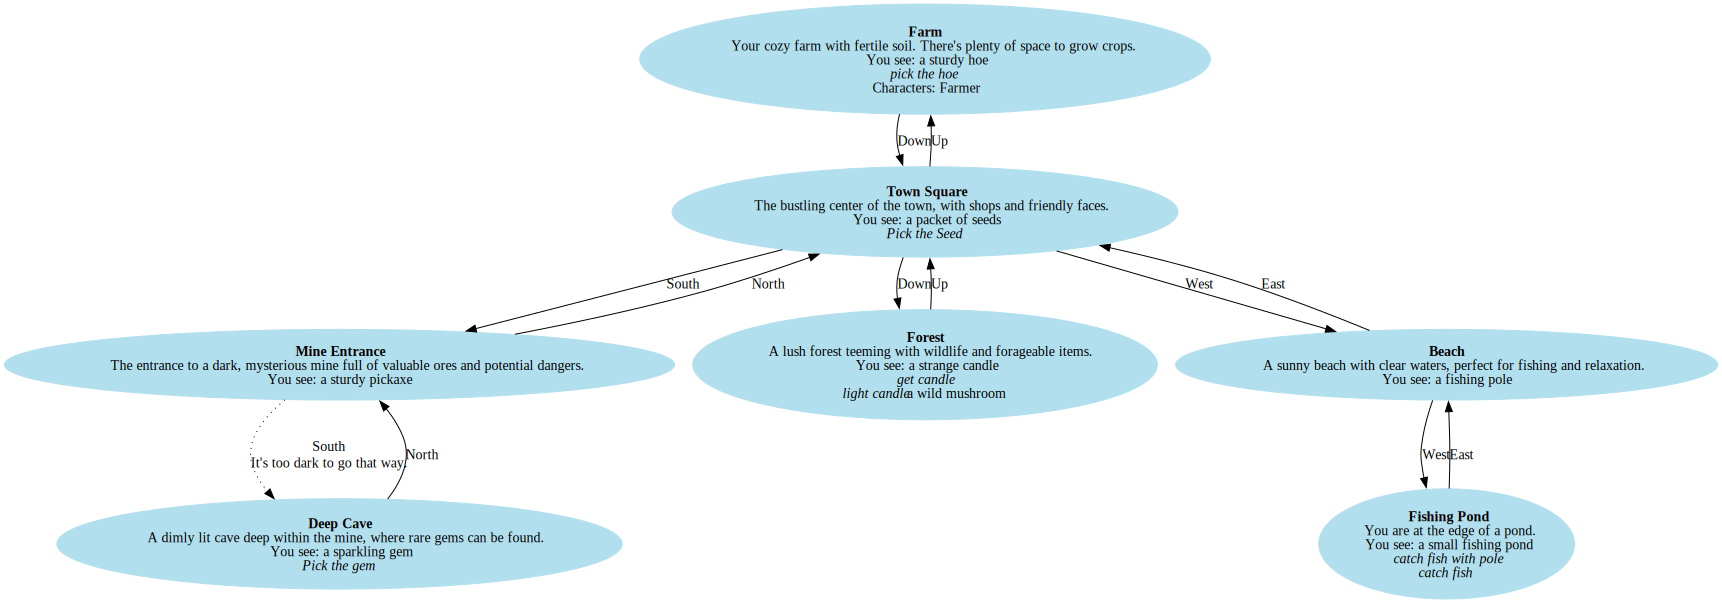

In [26]:
# Visualize the game
viz = Visualizer(game)
graph = viz.visualize()
graph

In [27]:

custom_actions = [Plant]
game = StardewValleyLite(farm, player, custom_actions=custom_actions)


In [28]:
game.game_loop()

Your cozy farm with fertile soil. There's plenty of space to grow crops.
Exits:
Down to Town Square

You see:
 * a sturdy hoe
        pick the hoe


Farmer got the hoe.
The bustling center of the town, with shops and friendly faces.
Exits:
Up to Farm
South to Mine Entrance
Down to Forest
West to Beach

You see:
 * a packet of seeds
        Pick the Seed


Farmer got the seeds.
I'm not sure what you want to do.
A lush forest teeming with wildlife and forageable items.
Exits:
Up to Town Square

You see:
 * a strange candle
        get candle
        light candle
 * a wild mushroom


Farmer got the candle.
The bustling center of the town, with shops and friendly faces.
Exits:
Up to Farm
South to Mine Entrance
Down to Forest
West to Beach




The entrance to a dark, mysterious mine full of valuable ores and potential
dangers.
Exits:
North to Town Square
South to Deep Cave

You see:
 * a sturdy pickaxe


Farmer lights the candle. It glows.
I'm not sure what you want to do.
Farmer lights the